# Initialization

In [1]:
%load_ext autoreload
%autoreload 2
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
import tigre
from scipy.signal import fftconvolve

sys.path.insert(0,'../xpecgen')

import xpecgen as xg

In [11]:
det = 'CWO'
geo = 'catphan_low_contrast_256'
spectrum_file = 'Al_spectrum_6'

angles = np.linspace(0,2*np.pi,90)

In [12]:
s = xg.Spectrum()

energies = []
fluence = []

phantom = xg.Catphan_515(os.path.join(xg.data_path,f'phantoms/{geo}.npy'))

with open(os.path.join(xg.data_path, "MV_spectra", f'{spectrum_file}.txt')) as f:
    for line in f:
        energies.append(float(line.split()[0]))
        fluence.append(float(line.split()[1]))

# Check if MV

s.x = np.array(energies)*1000  # to keV
s.y = np.array(fluence)

In [13]:
original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])


# Equivalent Fastcat

In [15]:
angles = np.linspace(0,2*pi,360)

phan_map =  ['air','water','adipose','lung','brain','muscle','pmma','bone']

spectrum = xg.Spectrum()

spectrum.x = energies
spectrum.y = fluence

det = 'CWO'

dump_files = os.path.join(
    xg.data_path, "Detectors", det, '*phsp.npy')
energy_deposition_file = os.path.join(
    xg.data_path, "Detectors", det, 'EnergyDeposition.npy')

kernel, kernels = xg.get_kernel(
                        s, dump_files, energy_deposition_file)

energy_deposition_file = os.path.join(
    xg.data_path, "Detectors", det, 'EnergyDeposition.npy')

energies = s.x
fluence = s.y
deposition_efficiency_file = energy_deposition_file

projs_xg = xg.return_projs(phantom.phantom,kernel,
                           energies,fluence,angles,phantom.geomet,
                           deposition_efficiency_file=deposition_efficiency_file
                           ,phantom_mapping = phan_map,
                          dose=0)

(17,) (17,)
2.7531475674096697 Sum of the deposition


In [58]:
img_xg = tigre.algorithms.FDK(
    np.transpose(np.array(projs_xg[0]),[0,2,1]), phantom.geomet,angles)

In [61]:
a,b,c,d = phantom.analyse_515(img_xg[5])


image = img_xg[5]

0.05717237 0.0006760738


<IPython.core.display.Javascript object>


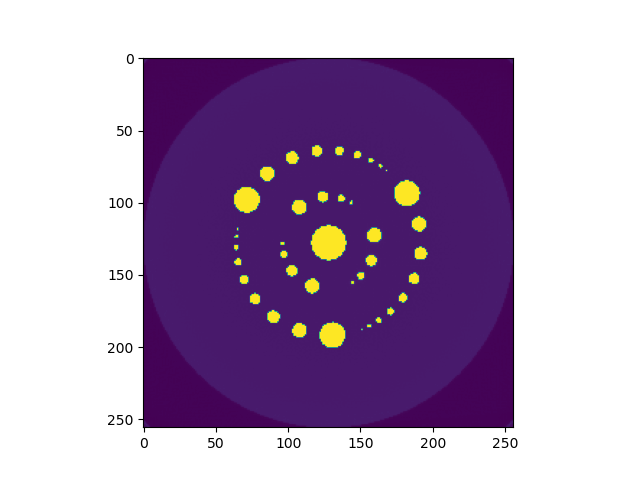

In [63]:
image2 = d != 0

image[image2] = 1

plt.figure()
plt.imshow(image)

<IPython.core.display.Javascript object>


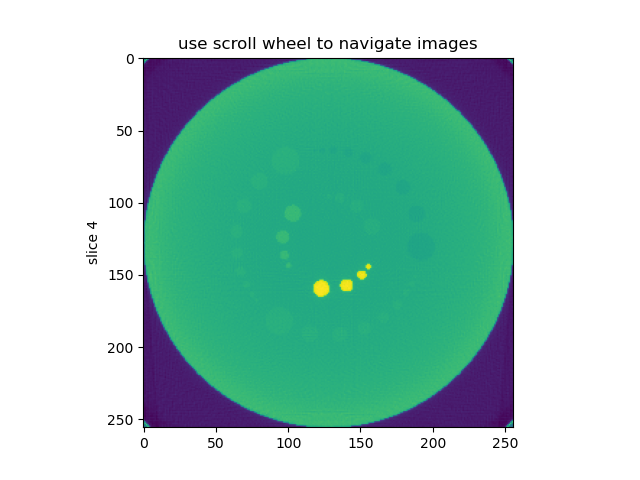

In [23]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(img_xg.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [42]:
np.array(projs_xg)[0].shape

(360, 512, 64)

In [ ]:
xg.analyse_515(img_xg[5])

### Manual Analysis

In [ ]:
from xpecgen import *

In [ ]:
recon_slice = img_xg[5]

def create_mask():

    im = np.zeros([256,256])
    ii = 1

    # CTMAT(x) formel=H2O dichte=x
    LEN = 100

    A0  = 87.7082*np.pi/180
    A1 = 108.3346*np.pi/180
    A2 = 126.6693*np.pi/180
    A3 = 142.7121*np.pi/180
    A4 = 156.4631*np.pi/180
    A5 = 167.9223*np.pi/180
    A6 = 177.0896*np.pi/180
    A7 = 183.9651*np.pi/180
    A8 = 188.5487*np.pi/180

    B0 = 110.6265*np.pi/180
    B1 = 142.7121*np.pi/180
    B2 = 165.6304*np.pi/180
    B3 = 179.3814*np.pi/180

    # Phantom 
    # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
    create_circular_mask(x= 0.000,  y= 0.000,  r=1.0, index = ii, image = im)

    ii += 1

    # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
    create_circular_mask(x= 5*cos(A0),  y= 5*sin(A0),  r=0.75, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A1),  y= 5*sin(A1),  r=0.45, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A2),  y= 5*sin(A2),  r=0.40, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A3),  y= 5*sin(A3),  r=0.35, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A4),  y= 5*sin(A4),  r=0.30, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A5),  y= 5*sin(A5),  r=0.25, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A6),  y= 5*sin(A6),  r=0.20, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A7),  y= 5*sin(A7),  r=0.15, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A8),  y= 5*sin(A8),  r=0.10, index = ii, image = im); ii += 1

    return im

def create_mask_multi():

    im = np.zeros([256,256])
    ii = 1

    # CTMAT(x) formel=H2O dichte=x
    LEN = 100

    A0  = 87.7082*np.pi/180
    A1 = 108.3346*np.pi/180
    A2 = 126.6693*np.pi/180
    A3 = 142.7121*np.pi/180
    A4 = 156.4631*np.pi/180
    A5 = 167.9223*np.pi/180
    A6 = 177.0896*np.pi/180
    A7 = 183.9651*np.pi/180
    A8 = 188.5487*np.pi/180

    B0 = 110.6265*np.pi/180
    B1 = 142.7121*np.pi/180
    B2 = 165.6304*np.pi/180
    B3 = 179.3814*np.pi/180

    # Phantom 
    # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
    create_circular_mask(x= 0.000,  y= 0.000,  r=1.0, index = ii, image = im)

    ii += 1

    # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
    create_circular_mask(x= 2.5*cos(B0),  y= 2.5*sin(B0),  r=0.45, index = ii, image = im); ii += 1
    create_circular_mask(x= 2.5*cos(B0+2/3*np.pi) ,y= 2.5*sin(B0+2/3*np.pi),  r=0.45  , index = ii, image = im); ii += 1
    create_circular_mask(x= 2.5*cos(B0+4/3*np.pi) ,y= 2.5*sin(B0+4/3*np.pi),  r=0.45  , index = ii, image = im); ii += 1

    create_circular_mask(x= 5*cos(A0+4/3*np.pi),  y= 5*sin(A0+4/3*np.pi),  r=0.75, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A0),  y= 5*sin(A0),  r=0.75, index = ii, image = im); ii += 1
    create_circular_mask(x= 5*cos(A0+2/3*np.pi),  y= 5*sin(A0+2/3*np.pi),  r=0.75, index = ii, image = im); ii += 1

    return im

def create_circular_mask(x, y, r, index, image):

    h,w = image.shape

    center = [x*int(w/2)/10 + int(w/2),y*int(h/2)/10 + int(h/2)]

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if r is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= r*int(w/2)/10


    image[mask] = index

im = create_mask_multi()

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(img_xg[5])

contrast = []
noise = []
cnr = []

ii = 1

ref_mean = np.mean(recon_slice[im == ii])
ref_std = np.std(recon_slice[im == ii])

for ii in range(2,11):

    contrast.append(np.abs(np.mean(recon_slice[im == ii])- ref_mean))
    noise.append(np.std(recon_slice[im == ii]))

    cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2 + ref_std**2)))

rs = np.linspace(0.1,0.45,8)

print(contrast)

In [ ]:
recon = np.load('../xpecgen/data/projs/low_contrast_recon.npy')

In [ ]:
img_xg.shape

In [2]:
noises = np.load('./noise_kernel_int.npy')

<IPython.core.display.Javascript object>


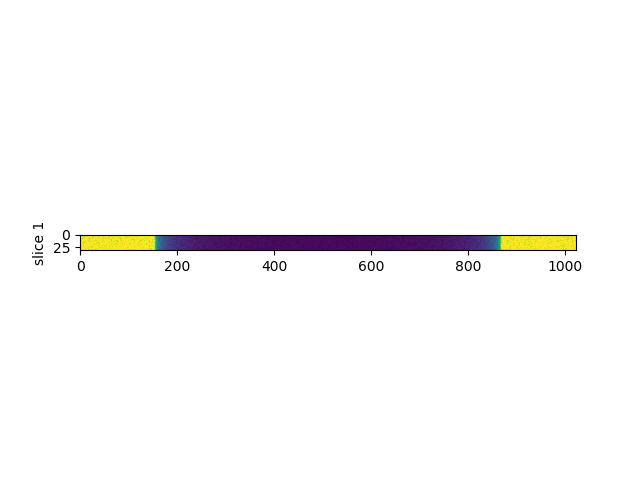

In [3]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax; self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()
    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()
    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
fig, ax = plt.subplots(1, 1)

X = np.sum(noises,3).T

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [4]:
noises.shape

(16, 1024, 32, 53)

In [7]:
noises_512 = (noises[:,::2,:,:] + noises[:,1::2,:,:])/2

noise_512_64 = np.tile(noises_512,[1,1,2,1])

noise_512_64[0] = noise_512_64[1]

print(noise_512_64.shape)

np.save('noise_projections',noise_512_64)

(16, 512, 64, 53)


In [ ]:
noise_512_64_15.transpose([1.shape

In [ ]:
fig, ax = plt.subplots(1, 1)

X = np.array(proj)[0,:,:,:].T

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [ ]:
np.array(proj).shape

### energies projections x y vs energies x y energies

# Need to use spectrum to weight the different spectra and sum to get the scatter as a function of energy 

# The scatter was normalized to the number of particles already

Can just multiply through with the normalized spectra

In [ ]:
energies

In [ ]:
original_energies_keV.shape

In [ ]:
fluence